In [1]:
import tools as tl
%load_ext autoreload
%autoreload 2
import pandas as pd

In [2]:
tickers = ['PKI','KR','VNO','NEM','BIIB','HFC','NFLX','COG','NLOK','FLIR','SEE','CLX','ABMD','AAL','DPZ','CPB','TSLA','GILD','LB','CTXS','MRO']
start="2012-01-01"
end="2016-12-31"

In [3]:
data = tl.get_data(tickers, start, end)
returns = data["Returns"]

In [6]:
# weights1, diversification_ratio_historic1 = tl.weights_rolling_window(returns, nb_months=12,long=False,short=False)
weights2, diversification_ratio_historic2 = tl.weights_rolling_window(returns, max_expected_return=False, nb_months=12,long=True,short=False, beta_eq=False,transition_cost=[0.01,2], maxturnover = [0.5,2], RSI2 = [-10, 1])
weights3, diversification_ratio_historic3 = tl.weights_rolling_window(returns, max_expected_return=False, nb_months=12,long=False,short=True, beta_eq=False,transition_cost=[0.01,2], maxturnover = [0.5,2], RSI2 = [-10, 1])
weights4, diversification_ratio_historic4 = tl.weights_rolling_window(returns, max_expected_return=False, nb_months=12,long=True,short=True, beta_eq=False,transition_cost=[0.01,2], maxturnover = [0.5,2], RSI2 = [-10, 1])

In [7]:
# dr_portfolio_return1 = tl.portfolio_return(weights1, returns[weights1.index[0]:])
# dr_portfolio_return1.columns = ["Portfolio 1"]
# dr_portfolio_cumreturn1 = tl.cumulated_returns(dr_portfolio_return1)

dr_portfolio_return2 = tl.portfolio_return(weights2, returns[weights2.index[0]:])
dr_portfolio_return2.columns = ["Long=True & Short=False"]
dr_portfolio_cumreturn2 = tl.cumulated_returns(dr_portfolio_return2)

dr_portfolio_return3 = tl.portfolio_return(weights3, returns[weights3.index[0]:])
dr_portfolio_return3.columns = ["Long=False & Short=True"]
dr_portfolio_cumreturn3 = tl.cumulated_returns(dr_portfolio_return3)

dr_portfolio_return4 = tl.portfolio_return(weights4, returns[weights4.index[0]:])
dr_portfolio_return4.columns = ["Long=True & Short=True"]
dr_portfolio_cumreturn4 = tl.cumulated_returns(dr_portfolio_return4)

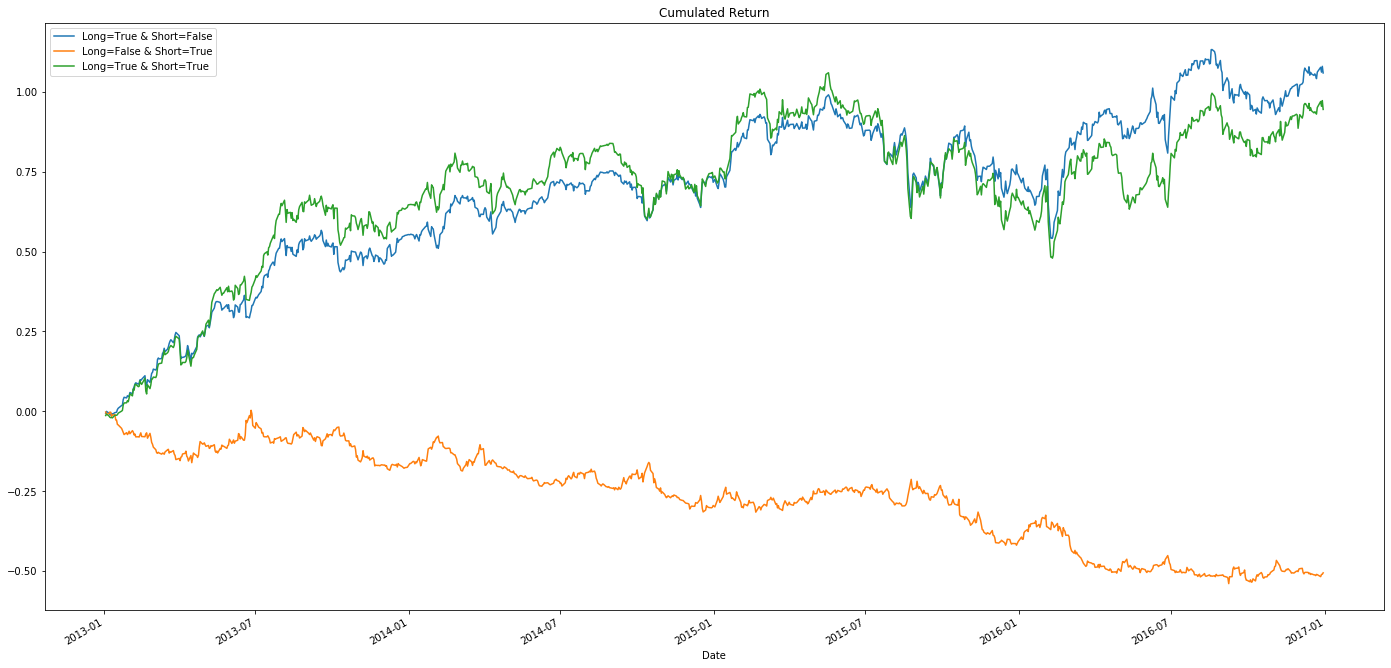

In [8]:
ax = dr_portfolio_cumreturn2.plot(figsize=(24,12), title="Cumulated Return")
# dr_portfolio_cumreturn1.plot(ax=ax)
dr_portfolio_cumreturn3.plot(ax=ax)
dr_portfolio_cumreturn4.plot(ax=ax)

In [9]:
weights5, diversification_ratio_historic5 = tl.weights_rolling_window(returns, max_expected_return=False, nb_months=12,long=True,short=True,beta_eq=False,transition_cost=[0.01,2], maxturnover = [0.5,2], RSI2 = [-10, 1])
weights6, diversification_ratio_historic6 = tl.weights_rolling_window(returns, max_expected_return=False, nb_months=12,long=True,short=True,beta_eq=True,transition_cost=[0.01,2], maxturnover = [0.5,2], RSI2 = [-10, 1])

dr_portfolio_return5 = tl.portfolio_return(weights5, returns[weights5.index[0]:])
dr_portfolio_return5.columns = ["Beta_eq = False"]
dr_portfolio_cumreturn5 = tl.cumulated_returns(dr_portfolio_return5)

dr_portfolio_return6 = tl.portfolio_return(weights6, returns[weights6.index[0]:])
dr_portfolio_return6.columns = ["Beta_eq = True"]
dr_portfolio_cumreturn6 = tl.cumulated_returns(dr_portfolio_return6)

Optimization status 0 :  False
Optimization status 1 :  False
Optimization status 2 :  False
Optimization status 3 :  False
Optimization status 4 :  False
Optimization status 5 :  False
Optimization status 6 :  False
Optimization status 7 :  False
Optimization status 8 :  False
Optimization status 9 :  False
Optimization status 10 :  False
Optimization status 11 :  False
Optimization status 12 :  False
Optimization status 13 :  False
Optimization status 14 :  False
Optimization status 15 :  False
Optimization status 16 :  False
Optimization status 17 :  False
Optimization status 18 :  False
Optimization status 19 :  False
Optimization status 20 :  False
Optimization status 21 :  False
Optimization status 22 :  False
Optimization status 23 :  False
Optimization status 24 :  False
Optimization status 25 :  False
Optimization status 26 :  False
Optimization status 27 :  False
Optimization status 28 :  False
Optimization status 29 :  False
Optimization status 30 :  False
Optimization statu

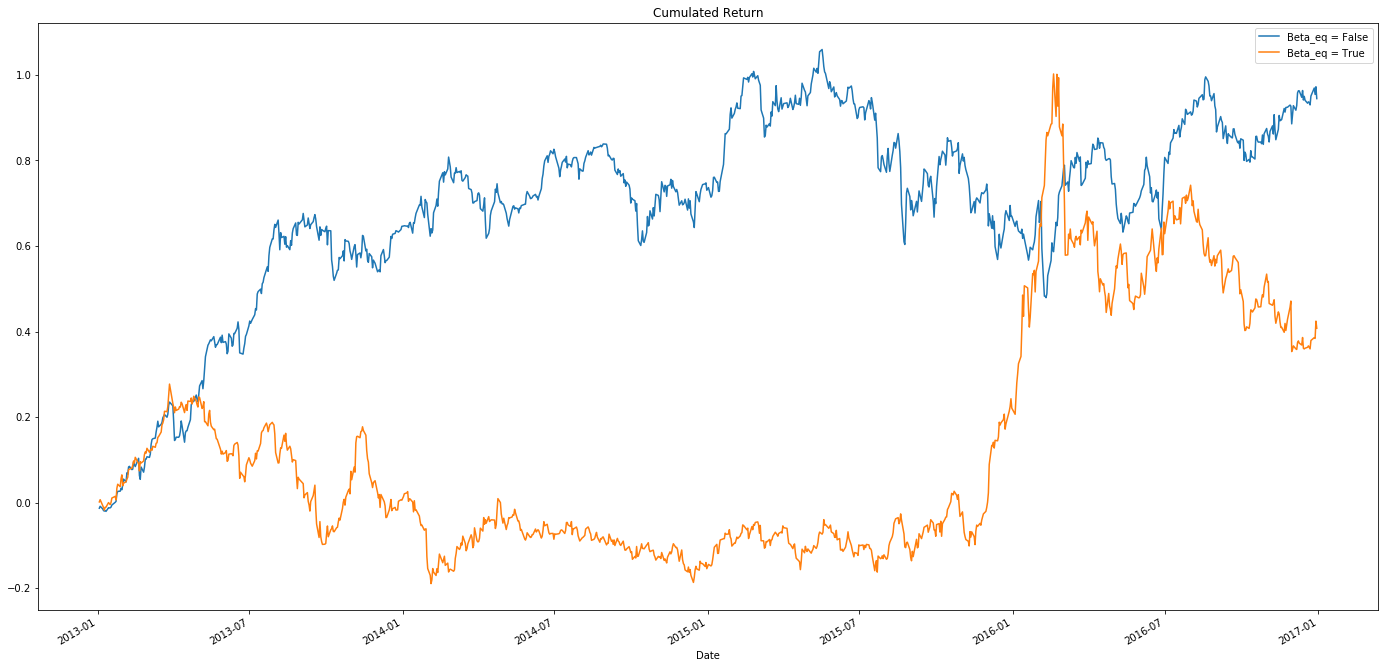

In [10]:
ax = dr_portfolio_cumreturn5.plot(figsize=(24,12), title="Cumulated Return")
dr_portfolio_cumreturn6.plot(ax=ax)

In [11]:
diversification_ratio = pd.concat([diversification_ratio_historic5['Optimized Portfolio'], diversification_ratio_historic6['Optimized Portfolio'], diversification_ratio_historic5["Equally Weighted Portfolio"]], axis=1)

diversification_ratio.columns = ["Optimized Portfolio, Beta_eq = False", "Optimized Portfolio, Beta_eq = True","Equally Weighted Portfolio"]

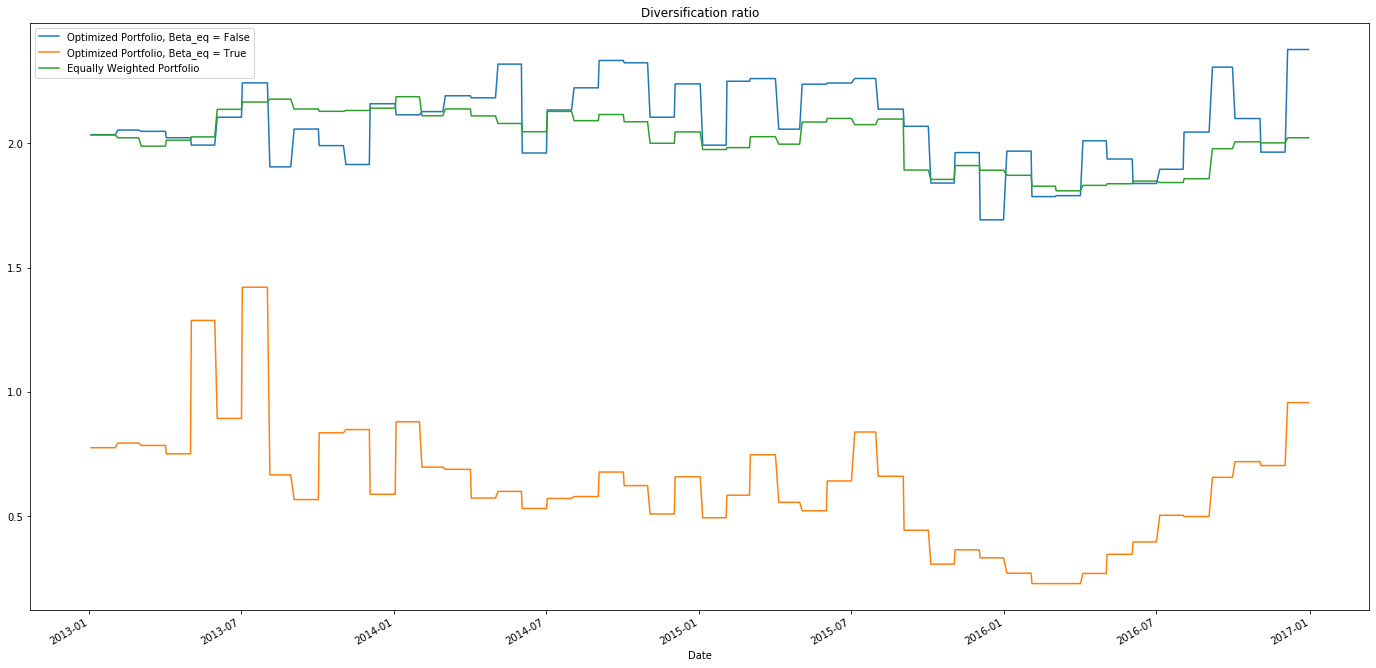

In [12]:
diversification_ratio.plot(figsize=(24,12), title=('Diversification ratio'))

In [34]:
weights7, diversification_ratio_historic7 = tl.weights_rolling_window(returns, nb_months=12,long=True,short=True,beta_eq=True, max_expected_return=False)
weights8, diversification_ratio_historic8 = tl.weights_rolling_window(returns, nb_months=12,long=True,short=True,beta_eq=True, max_expected_return=True)

dr_portfolio_return7 = tl.portfolio_return(weights7, returns[weights7.index[0]:])
dr_portfolio_return7.columns = ["Beta_eq = True & max_expected_return=False"]
dr_portfolio_cumreturn7 = tl.cumulated_returns(dr_portfolio_return7)

dr_portfolio_return8 = tl.portfolio_return(weights8, returns[weights8.index[0]:])
dr_portfolio_return8.columns = ["Beta_eq = True & max_expected_return=True"]
dr_portfolio_cumreturn8 = tl.cumulated_returns(dr_portfolio_return8)

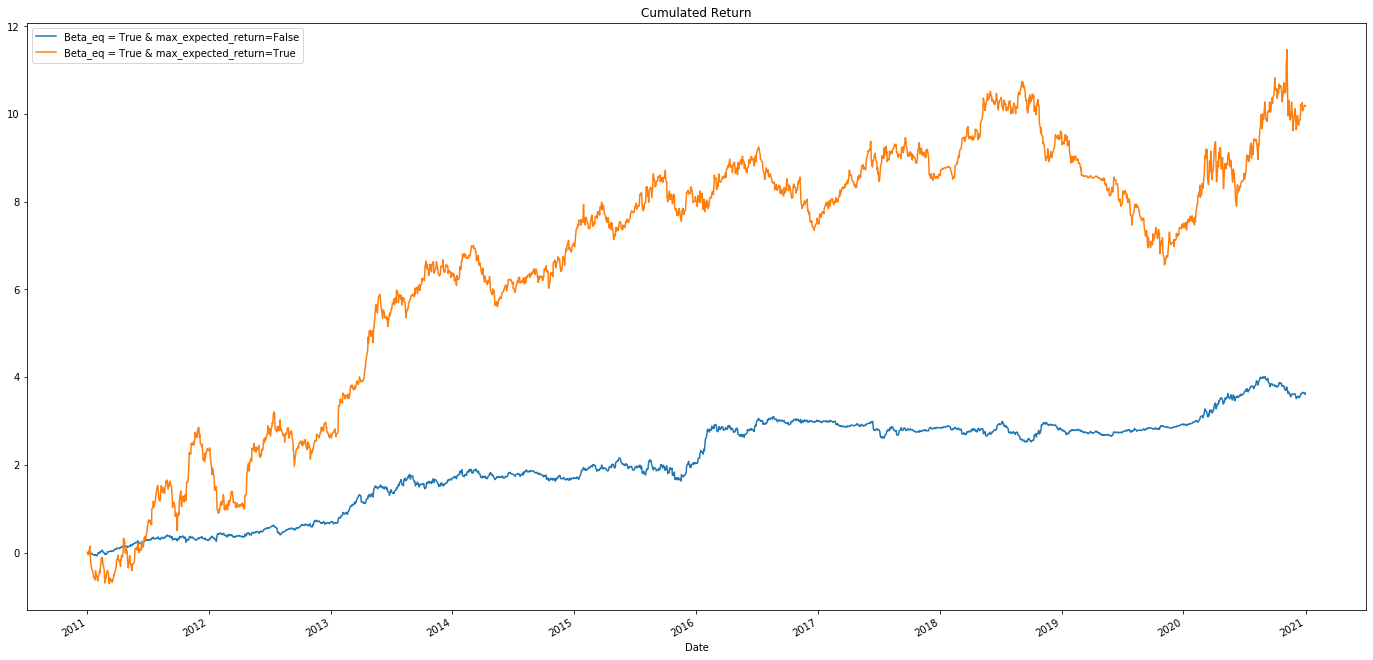

In [35]:
ax = dr_portfolio_cumreturn7.plot(figsize=(24,12), title="Cumulated Return")
dr_portfolio_cumreturn8.plot(ax=ax)

In [36]:
# diversification_ratio = pd.DataFrame([diversification_ratio_historic7['Optimized Portfolio'], diversification_ratio_historic8['Optimized Portfolio']])
diversification_ratio = pd.concat([diversification_ratio_historic7['Optimized Portfolio'], diversification_ratio_historic8['Optimized Portfolio'], diversification_ratio_historic7["Equally Weighted Portfolio"]], axis=1)

diversification_ratio.columns = ["Optimized Portfolio, Beta_eq = True & max_expected_return=False", "Optimized Portfolio, Beta_eq = True & max_expected_return=True","Equally Weighted Portfolio"]

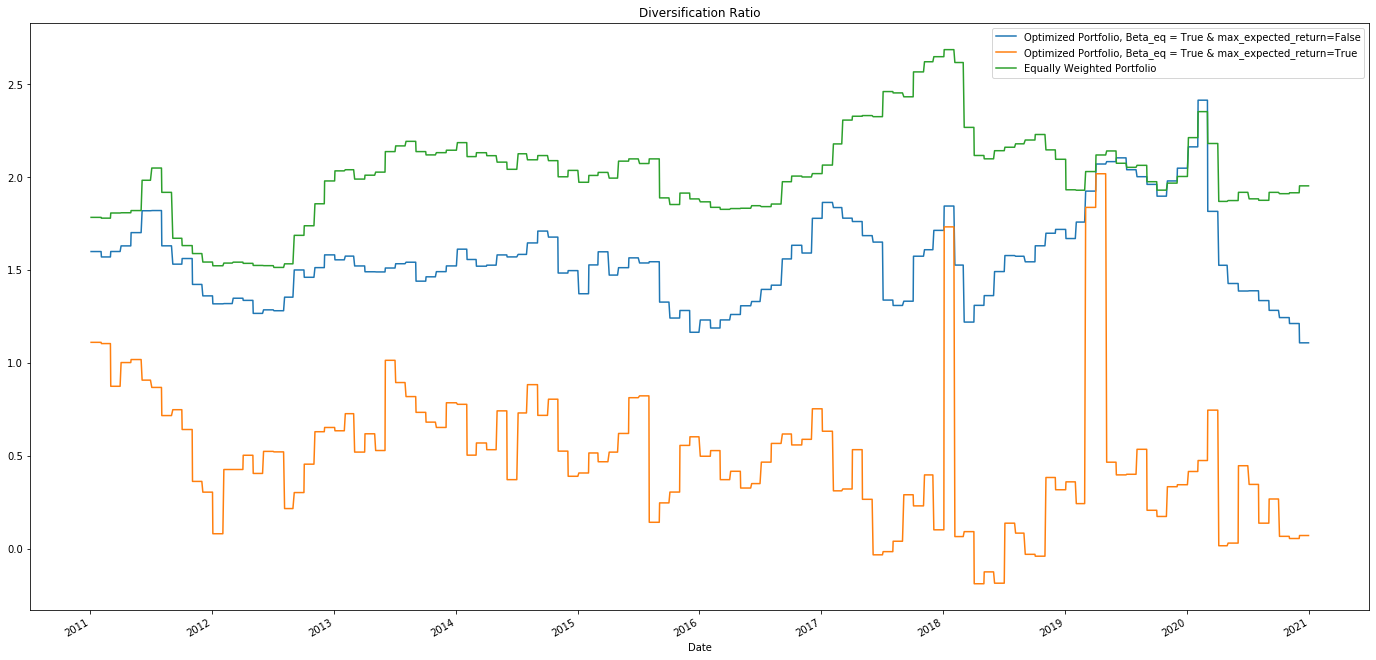

In [37]:
diversification_ratio.plot(figsize=(24,12), title="Diversification Ratio")

In [38]:
weights9, diversification_ratio_historic9 = tl.weights_rolling_window(returns, nb_months=12,long=True,short=True,beta_eq=False, max_expected_return=False)
weights10, diversification_ratio_historic10 = tl.weights_rolling_window(returns, nb_months=12,long=True,short=True,beta_eq=False, max_expected_return=True)

dr_portfolio_return9 = tl.portfolio_return(weights9, returns[weights9.index[0]:])
dr_portfolio_return9.columns = ["Beta_eq = False & max_expected_return=False"]
dr_portfolio_cumreturn9 = tl.cumulated_returns(dr_portfolio_return9)

dr_portfolio_return10 = tl.portfolio_return(weights10, returns[weights10.index[0]:])
dr_portfolio_return10.columns = ["Beta_eq = False & max_expected_return=True"]
dr_portfolio_cumreturn10 = tl.cumulated_returns(dr_portfolio_return10)

In [39]:
diversification_ratio = pd.concat([diversification_ratio_historic9['Optimized Portfolio'], diversification_ratio_historic10['Optimized Portfolio'], diversification_ratio_historic9["Equally Weighted Portfolio"]], axis=1)

diversification_ratio.columns = ["Optimized Portfolio, Beta_eq = False & max_expected_return=False", "Optimized Portfolio, Beta_eq = False & max_expected_return=True","Equally Weighted Portfolio"]

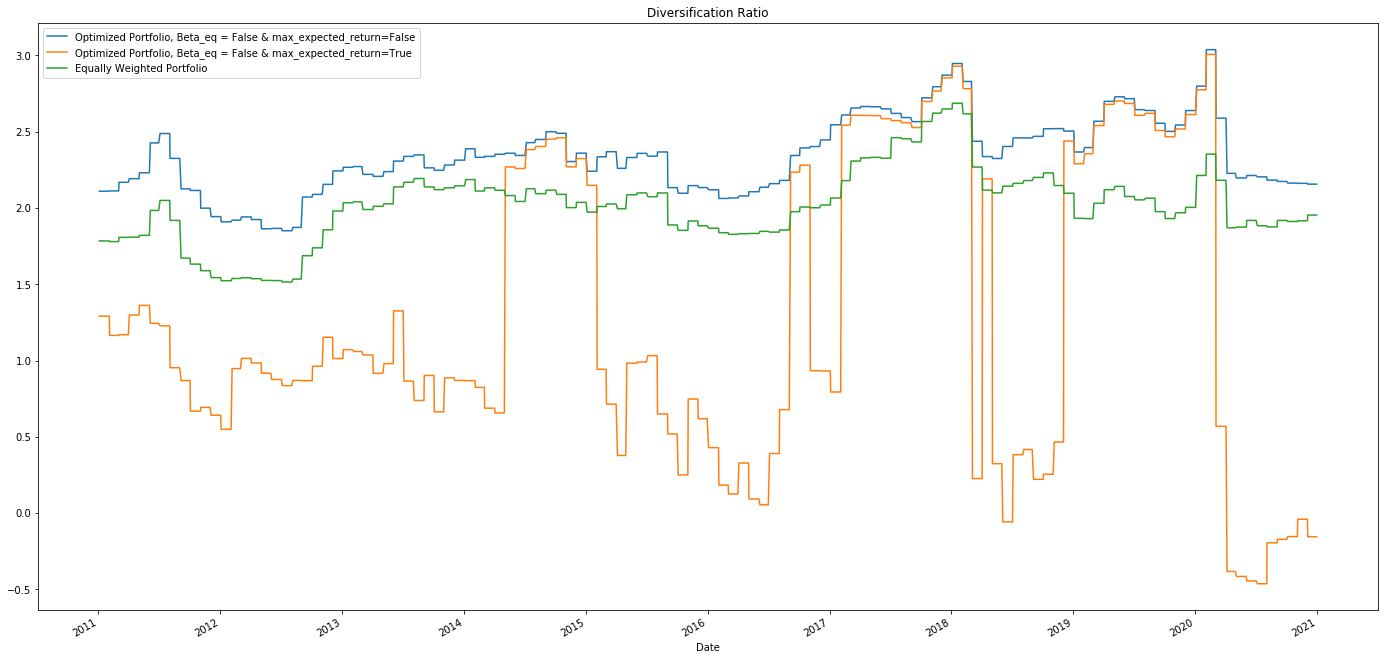

In [40]:
diversification_ratio.plot(figsize=(24,12), title="Diversification Ratio")

In [41]:
weights11, diversification_ratio_historic11 = tl.weights_rolling_window(returns, nb_months=12,long=True,short=True,beta_eq=False, max_expected_return=False)
weights12, diversification_ratio_historic12 = tl.weights_rolling_window(returns, nb_months=12,long=True,short=True,beta_eq=False, max_expected_return=True, diversification=False)

dr_portfolio_return11 = tl.portfolio_return(weights11, returns[weights11.index[0]:])
dr_portfolio_return11.columns = ["Beta_eq = False & max_expected_return=False & Diversification=True"]
dr_portfolio_cumreturn11 = tl.cumulated_returns(dr_portfolio_return11)

dr_portfolio_return12 = tl.portfolio_return(weights12, returns[weights12.index[0]:])
dr_portfolio_return12.columns = ["Beta_eq = False & max_expected_return=True & Diversification=False"]
dr_portfolio_cumreturn12 = tl.cumulated_returns(dr_portfolio_return12)

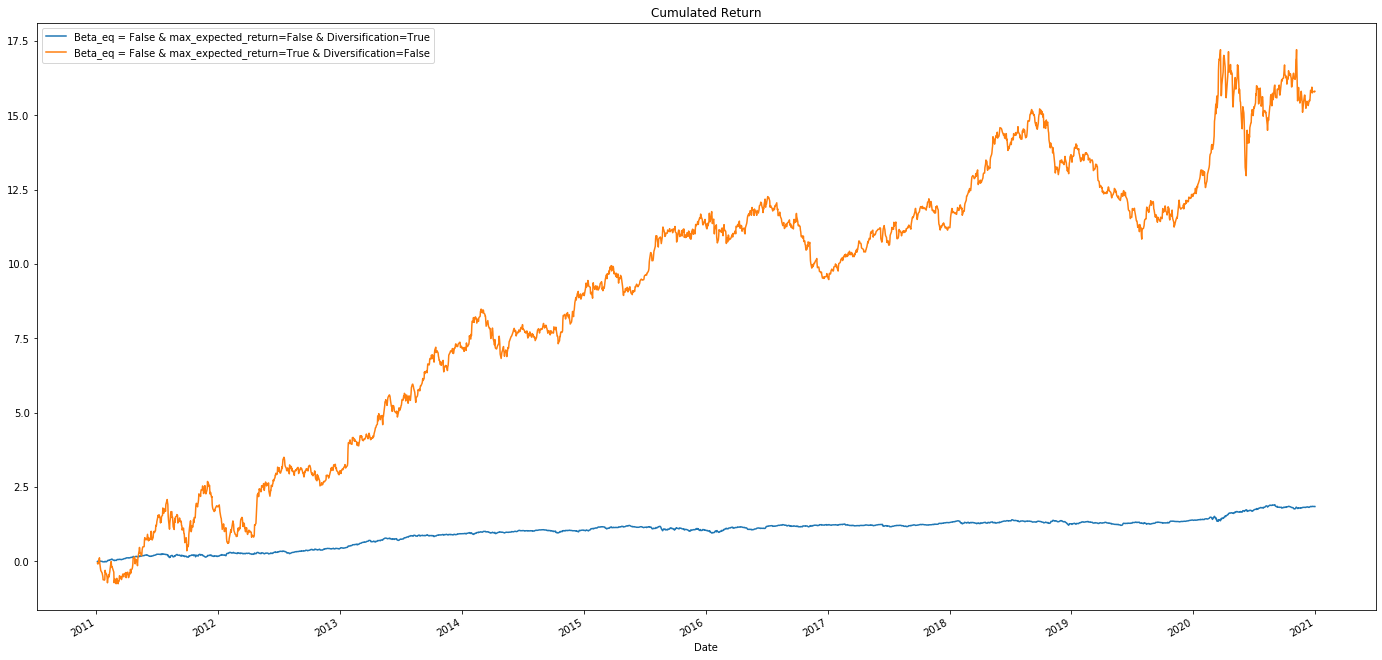

In [42]:
ax = dr_portfolio_cumreturn11.plot(figsize=(24,12), title="Cumulated Return")
dr_portfolio_cumreturn12.plot(ax=ax)

In [43]:
diversification_ratio = pd.concat([diversification_ratio_historic11['Optimized Portfolio'], diversification_ratio_historic12['Optimized Portfolio'], diversification_ratio_historic11["Equally Weighted Portfolio"]], axis=1)

diversification_ratio.columns = ["Optimized Portfolio, Beta_eq = False & max_expected_return=False & Diversification=True", "Optimized Portfolio, False & max_expected_return=True & Diversification=False","Equally Weighted Portfolio"]

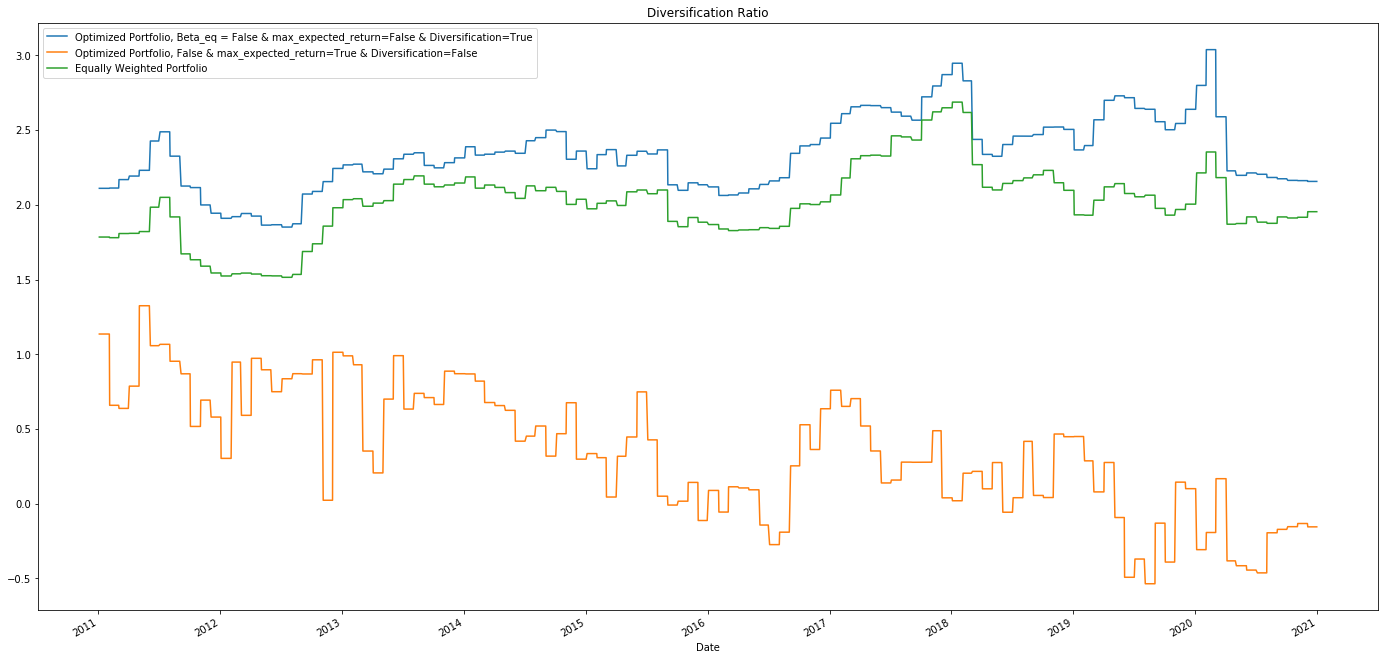

In [44]:
diversification_ratio.plot(figsize=(24,12), title="Diversification Ratio")

In [45]:
weights13, diversification_ratio_historic13 = tl.weights_rolling_window(returns, nb_months=14,long=True,short=True,beta_eq=True, max_expected_return=False, diversification=False)
weights14, diversification_ratio_historic14 = tl.weights_rolling_window(returns, nb_months=14,long=True,short=True,beta_eq=True, max_expected_return=True, diversification=False)

dr_portfolio_return13 = tl.portfolio_return(weights13, returns[weights13.index[0]:])
dr_portfolio_return13.columns = ["Beta_eq = True & max_expected_return=False & Diversification=False"]
dr_portfolio_cumreturn13 = tl.cumulated_returns(dr_portfolio_return13)

dr_portfolio_return14 = tl.portfolio_return(weights14, returns[weights14.index[0]:])
dr_portfolio_return14.columns = ["Beta_eq = True & max_expected_return=True & Diversification=False"]
dr_portfolio_cumreturn14 = tl.cumulated_returns(dr_portfolio_return14)

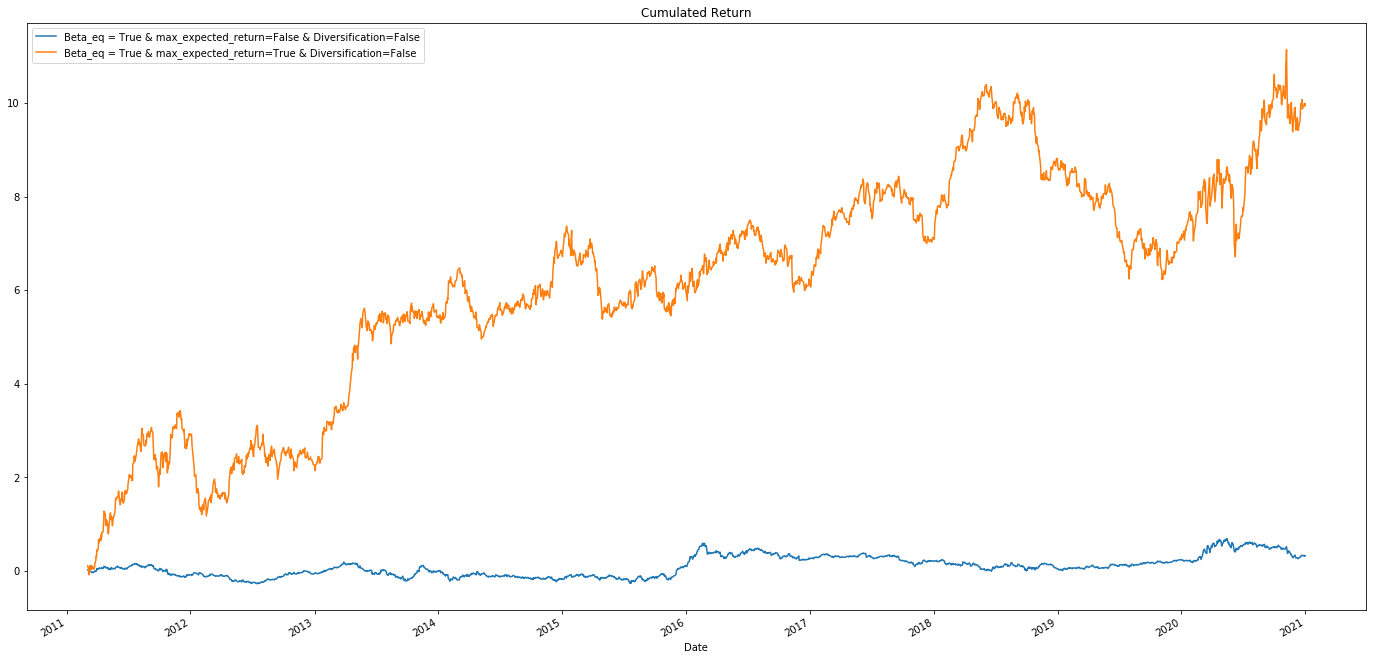

In [46]:
ax = dr_portfolio_cumreturn13.plot(figsize=(24,12), title="Cumulated Return")
dr_portfolio_cumreturn14.plot(ax=ax)